In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# made by chatgpt to install csv as file is to big to commit to github

import kagglehub
import shutil
import os

# Define the current working directory
current_directory = os.getcwd()

# Check if the CSV file already exists in the current directory
csv_exists = any(file.endswith(".csv") for file in os.listdir(current_directory))

if not csv_exists:
    # Download the dataset using kagglehub
    default_path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")

    # Move all downloaded CSV files to the current directory
    for file_name in os.listdir(default_path):
        if file_name.endswith(".csv"):
            shutil.move(os.path.join(default_path, file_name), os.path.join(current_directory, file_name))

    # Delete the downloaded folder after moving the files
    shutil.rmtree(default_path)

    print("Dataset files moved to:", current_directory)
    print(f"Deleted temporary folder: {default_path}")
else:
    print("CSV file already exists in the current directory.")


Resuming download from 89128960 bytes (97256559 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/jainilcoder/online-payment-fraud-detection?dataset_version_number=1 (89128960/186385519) bytes left.


100%|██████████| 178M/178M [00:04<00:00, 23.9MB/s] 

Extracting files...


Dataset files moved to: c:\Users\mjcul\OneDrive\Documents\GitHub\DataScience\FraudDetector
Deleted temporary folder: C:\Users\mjcul\.cache\kagglehub\datasets\jainilcoder\online-payment-fraud-detection\versions\1


In [3]:
df = pd.read_csv('onlinefraud.csv', header=0)  # Header=0 to use the first row as column names

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# convert type to numerical
type_mapping = {
    'CASH_IN': 1,
    'CASH_OUT': 2,
    'DEBIT': 3,
    'PAYMENT': 4,
    'TRANSFER': 5
}
df['type'] = df['type'].map(type_mapping)


# Drop not need columns
df = df.drop(columns=['nameOrig', 'nameDest',])

df.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,4,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,5,181.00,181.0,0.00,0.0,0.0,1,0
3,1,2,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,4,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [5]:
# Define features (X) and target (y)
X = df.drop(columns=['isFraud','isFlaggedFraud'])
y = df['isFraud']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree
dtree = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10)

In [6]:
# Make predictions
y_pred = dtree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906351
           1       0.14      0.98      0.25      2435

    accuracy                           0.99   1908786
   macro avg       0.57      0.99      0.62   1908786
weighted avg       1.00      0.99      1.00   1908786

Confusion Matrix:
[[1892147   14204]
 [     47    2388]]


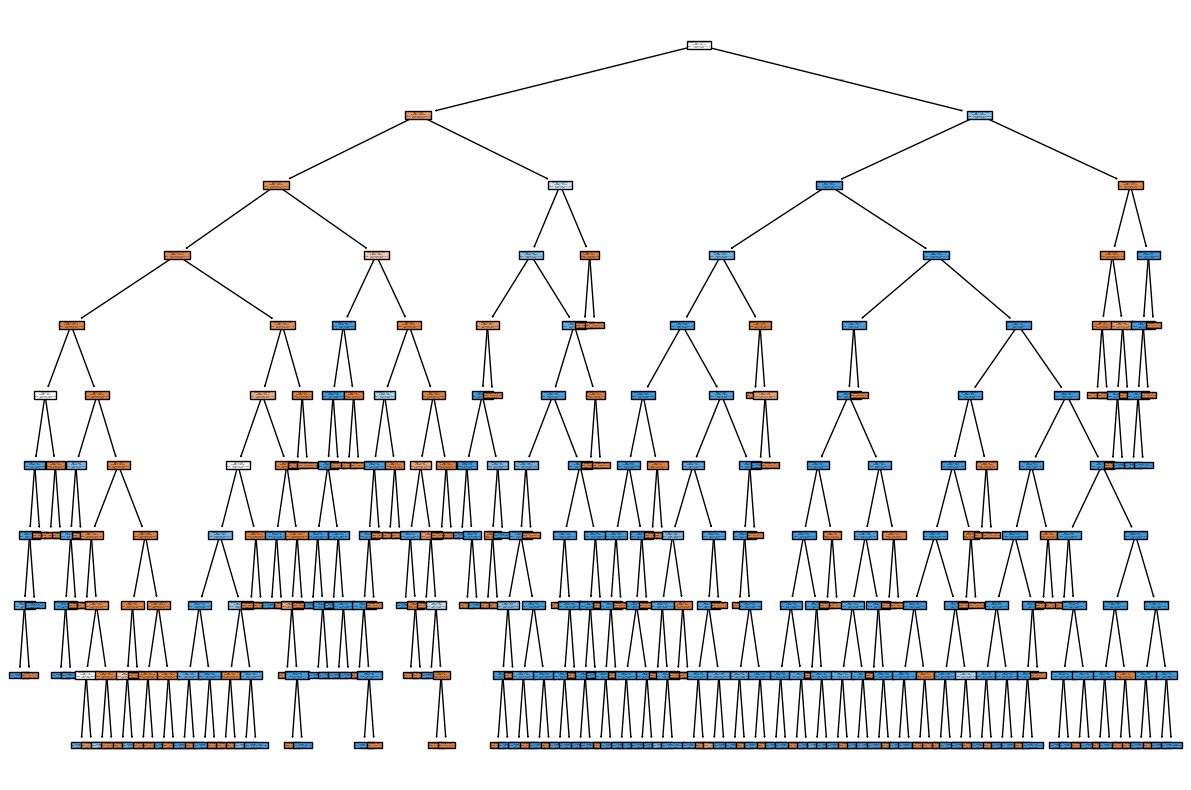

In [7]:
plt.figure(figsize=(15, 10)) # make picture bigger
plot_tree(dtree, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()